In [1]:
#kütüphaneleri import edilmesi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [2]:
data = pd.read_csv('/kaggle/input/arac-modellerine-gore-satis-verileri/arac-modellerine-gore-satis-verileri.csv')

In [3]:
data.shape

(558837, 16)

In [4]:
data.head() #birkaç satırın incelenmesi

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
data.info() #özet bilgiler ile verisetinin incelenmesi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [6]:
data.describe() #sayısal sütunları incelenmesi

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [7]:
data[data.duplicated('vin')].sample(20) #vin sütununda tekrar eden satırlardan rastgele 20 örnek seçilmesi

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
548832,2007,Nissan,Pathfinder,LE,suv,automatic,5n1ar18u07c624523,ga,36.0,120208.0,gray,black,innovative auto llc,7075.0,7200.0,Tue Jun 16 2015 06:10:00 GMT-0700 (PDT)
59091,2005,Volkswagen,New Beetle,Bi-Color Edition,Hatchback,automatic,3vwck31c35m417311,ca,27.0,139184.0,black,beige,nvp remarketing,1475.0,2300.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
328162,2008,Mitsubishi,Lancer Evolution,GSR,Sedan,manual,ja3aw86v38u044968,pa,37.0,81371.0,red,black,exceptional motorcars ltd,17800.0,17600.0,Wed Feb 18 2015 01:00:00 GMT-0800 (PST)
374041,2012,BMW,5 Series,528i xDrive,Sedan,NaN,wbaxh5c52cdw07376,pa,49.0,45875.0,blue,tan,r hollenshead auto sales inc,25800.0,27000.0,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
386254,2013,Mazda,CX-9,Touring,SUV,automatic,jm3tb2ca9d0411241,tn,37.0,43623.0,white,beige,meridian remarketing,19450.0,19200.0,Wed Mar 04 2015 02:30:00 GMT-0800 (PST)
328085,2008,Honda,Accord,EX-L V-6,Sedan,automatic,1hgcp36878a085515,fl,35.0,60828.0,silver,gray,tdaf remarketing,11250.0,12300.0,Tue Feb 17 2015 01:00:00 GMT-0800 (PST)
240568,2012,Dodge,Grand Caravan,SXT,Minivan,automatic,2c4rdgcg0cr137303,ca,2.0,52514.0,white,black,ag leaseplan,11150.0,8200.0,Wed Feb 04 2015 04:30:00 GMT-0800 (PST)
94632,2002,Ford,Focus,SE Comfort,Sedan,automatic,1fafp34392w358103,mi,28.0,123331.0,gold,tan,terry putrus,1450.0,1400.0,Thu Jan 15 2015 01:30:00 GMT-0800 (PST)
319594,2010,Lincoln,MKZ,Base,Sedan,automatic,3lnhl2jcxar621001,mi,28.0,79465.0,gray,gray,meridian remarketing,9875.0,8900.0,Thu Feb 19 2015 01:30:00 GMT-0800 (PST)
381423,2012,NaN,NaN,NaN,NaN,automatic,4a32b2ff6ce015665,fl,35.0,62157.0,white,black,tdaf remarketing,8275.0,9200.0,Tue Mar 03 2015 01:00:00 GMT-0800 (PST)


In [8]:
data[data['vin']== 'salmf13436a224332'] #vin sütununda tekrar eden aynı satırların incelenmesi

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
145721,2006,NaN,NaN,NaN,NaN,automatic,salmf13436a224332,ca,35.0,94118.0,black,black,clear view systems,15800.0,18100.0,Thu Jan 15 2015 04:00:00 GMT-0800 (PST)
304218,2006,NaN,NaN,NaN,NaN,automatic,salmf13436a224332,ca,42.0,94124.0,black,black,clear view systems,14850.0,17250.0,Tue Feb 17 2015 04:30:00 GMT-0800 (PST)


In [9]:
data.drop_duplicates(subset=['vin'],keep='last', inplace=True) #verisetindeki tekrarlanan satırların silinmesi

In [10]:
data.duplicated('vin').any() #verisetinde tekrarlanan satır olup olmadığının kontrol edilmesi

False

In [11]:
data.isna().sum() #verisetindeki her sütunun eksik değerlerin sayısını öğrenilmesi

year                0
make            10167
model           10265
trim            10501
body            12988
transmission    64272
vin                 1
state               0
condition       11506
odometer           83
color             727
interior          727
seller              0
mmr                14
sellingprice       12
saledate           12
dtype: int64

In [12]:
#aşağıdaki sütunlarda eksik değerler yerine other yazılması
data['make'] = data['make'].fillna('other')
data['model'] = data['model'].fillna('other')
data['trim'] = data['trim'].fillna('other')
data['body'] = data['body'].fillna('other')
data['transmission'] = data['transmission'].fillna('other')
data['color'] = data['color'].fillna('other')
data['interior'] = data['interior'].fillna('other')

In [13]:
data[data['mmr'].isna()] #mmr sütunundaki NaN değerlerini filtrelenmesi

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
306447,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4ac6dh687932,il,19.0,37254.0,gray,gray,kfl llc,NaN,NaN,NaN
406524,2013,Chrysler,300,Base,Sedan,automatic,2c3ccaag9dh723146,il,27.0,44208.0,silver,black,kfl llc,NaN,NaN,NaN
422358,2013,Hyundai,Sonata,GLS,Sedan,other,5npeb4ac3dh735368,az,28.0,44299.0,blue,gray,kfl llc,NaN,NaN,NaN
429644,2013,Chrysler,200,Touring,Sedan,automatic,1c3ccbbb9dn718531,il,25.0,47344.0,white,black,kfl llc,NaN,NaN,NaN
429660,2013,Dodge,Avenger,SXT,Sedan,automatic,1c3cdzcg5dn741076,il,34.0,44525.0,gray,black,kfl llc,NaN,NaN,NaN
429786,2013,Hyundai,Accent,GLS,Sedan,automatic,kmhct4ae7du450468,il,3.0,43135.0,silver,gray,kfl llc,NaN,NaN,NaN
431905,2013,Kia,Soul,Base,Wagon,automatic,kndjt2a5xd7765280,va,19.0,29465.0,silver,black,kfl llc,NaN,NaN,NaN
457035,2014,Hyundai,Elantra,SE,Sedan,automatic,5npdh4ae3eh504144,il,19.0,20775.0,white,—,kfl llc,NaN,NaN,NaN
457803,2013,Dodge,Charger,SE,Sedan,automatic,2c3cdxbg6dh688757,il,19.0,45355.0,white,black,kfl llc,NaN,NaN,NaN
522495,2012,Ford,Fusion,SEL,sedan,automatic,3fahp0jg5cr241590,va,26.0,51648.0,black,gray,kfl llc,NaN,NaN,NaN


In [14]:
data.drop(data[data['seller']=='kfl llc'].index,inplace=True) #seller sütununda kfl llc olan satırları silme sellingprice ve saledate verilerini gizliyor

In [15]:
data.drop(data[data['mmr'].isna()].index,inplace=True) #mmr sütununda NaN değerlerinin silinmesi

In [16]:
data[data['sellingprice'] < 100] #çok düşük satış fiyatlarının kaldırılması

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
293223,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew6eda13643,tx,41.0,31886.0,white,gray,u-haul,20800.0,1.0,Thu Feb 12 2015 03:00:00 GMT-0800 (PST)
348252,1995,Isuzu,Rodeo,LS,SUV,other,4s2cm58v9s4375559,va,1.0,254132.0,red,gray,automotive remarketing inc,375.0,1.0,Wed Mar 04 2015 01:05:00 GMT-0800 (PST)


In [17]:
data.drop(data[data['sellingprice'] < 100].index,inplace=True) #verisetinden silinmesi

In [18]:
data[data['odometer'].isna()].head(20) #odometer sütunun eksik ilk 20 satırının incelenmesi

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
3360,2007,Ford,Edge,SEL,SUV,other,2fmdk38c77bb39171,ca,32.0,NaN,gray,—,valley kia,2775.0,15500.0,Thu Jun 18 2015 05:00:00 GMT-0700 (PDT)
4301,2005,Nissan,Murano,SL,SUV,other,jn8az08t75w326816,ca,NaN,NaN,black,—,long beach bmw & long beach mini,4900.0,400.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
5119,2000,Mercedes-Benz,M-Class,ML320,SUV,automatic,4jgab54e5ya217238,ca,26.0,NaN,white,beige,cig financial,2050.0,1500.0,Wed Dec 31 2014 12:30:00 GMT-0800 (PST)
5219,1998,dodge,caravan,other,other,other,2b4fp25b6wr663533,ca,NaN,NaN,green,—,rock honda,675.0,300.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
5222,1995,Honda,Accord,LX,Sedan,other,jhmcd5633sc041707,ca,NaN,NaN,gold,—,rock honda,675.0,400.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9701,2011,GMC,Acadia,Denali,SUV,automatic,1gkkrted1bj389437,il,NaN,NaN,white,gray,remarketing by ge/manheim chicago,23400.0,20700.0,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)
13301,2009,Chevrolet,Cobalt,LT,Coupe,automatic,1g1at18h497275136,ny,NaN,NaN,silver,black,adk auto brokers inc,4925.0,12400.0,Thu Dec 18 2014 09:45:00 GMT-0800 (PST)
16454,2008,Mercury,Mariner,V6,SUV,automatic,4m2cu91128kj02083,ny,NaN,NaN,green,gray,the johnson dealerships inc,6725.0,4600.0,Thu Dec 18 2014 09:45:00 GMT-0800 (PST)
18012,2007,Ford,Focus,ZX3 S,Hatchback,other,1fafp31n37w207559,nv,NaN,NaN,silver,—,kars forever,2600.0,4700.0,Fri Dec 19 2014 12:00:00 GMT-0800 (PST)
19940,2006,Chrysler,PT Cruiser,Base,Wagon,automatic,3a4fy48b76t309535,oh,NaN,NaN,white,gray,select remarketing group llc/midwest title loans,1950.0,250.0,Thu Dec 18 2014 09:00:00 GMT-0800 (PST)


In [19]:
data[(data['year'] == 1998) & (data['make'] == 'dodge') & (data['model'] == 'caravan' )] #araç yılına markasına ve modeline göre filtrelenmesi

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
5181,1998,dodge,caravan,other,other,automatic,2b4fp25b4wr591568,ca,28.0,240737.0,brown,brown,south coast subaru,500.0,500.0,Wed Dec 31 2014 12:30:00 GMT-0800 (PST)
5219,1998,dodge,caravan,other,other,other,2b4fp25b6wr663533,ca,NaN,NaN,green,—,rock honda,675.0,300.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
5220,1998,dodge,caravan,se,other,automatic,2b4gp45g6wr755608,ca,NaN,165255.0,green,—,lithia chrysler jeep dodge,400.0,250.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
29573,1998,dodge,caravan,other,other,automatic,2b4fp25b9wr714541,ne,NaN,177903.0,burgundy,gray,woodhouse ford inc,650.0,500.0,Thu Dec 18 2014 11:00:00 GMT-0800 (PST)
29593,1998,dodge,caravan,other,other,automatic,2b4fp25b3wr734283,ga,NaN,116625.0,white,tan,nabors used cars,725.0,1300.0,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)


In [20]:
data.drop(data[data['odometer'].isna()].index,inplace=True) #eksik değerlerin odometer sütunundan silinmesi

In [21]:
data.isna().sum()  #eksik değerlerin sayısının incelenmesi

year                0
make                0
model               0
trim                0
body                0
transmission        0
vin                 0
state               0
condition       11448
odometer            0
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [22]:
data.describe() #sayısal sütunların istatistiklerinin incelenmesi

,year,condition,odometer,mmr,sellingprice
count,550199.000000,538751.000000,550199.000000,550199.000000,550199.000000
mean,2010.044982,30.694553,68326.084299,13761.887653,13612.063980
std,3.973632,13.408249,53543.676927,9682.683543,9754.392018
min,1982.000000,1.000000,1.000000,25.000000,100.000000
25%,2007.000000,23.000000,28287.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52094.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99236.500000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [23]:
data.info() #verisetindeki eksik değerlerin sayısının incelenmesi

<class 'pandas.core.frame.DataFrame'>
Index: 550199 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          550199 non-null  int64  
 1   make          550199 non-null  object 
 2   model         550199 non-null  object 
 3   trim          550199 non-null  object 
 4   body          550199 non-null  object 
 5   transmission  550199 non-null  object 
 6   vin           550199 non-null  object 
 7   state         550199 non-null  object 
 8   condition     538751 non-null  float64
 9   odometer      550199 non-null  float64
 10  color         550199 non-null  object 
 11  interior      550199 non-null  object 
 12  seller        550199 non-null  object 
 13  mmr           550199 non-null  float64
 14  sellingprice  550199 non-null  float64
 15  saledate      550199 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 71.4+ MB


In [24]:
data.head(20) #verisetindeki ilk 20 satırın görüntülenmesi

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [25]:
ml_data = data.copy() #datanın kopya oluşturup ml_data olarak adlandırılması

In [26]:
#kategorik verileri LabelEncoder ile sayısal verilere dönüştürülmesi
label_encoder = LabelEncoder()
colums_encode = ['make', 'model', 'trim', 'body', 'transmission', 'state',
                'color', 'interior']

for vlue in colums_encode:
    ml_data[f'encode_{vlue}'] = label_encoder.fit_transform(ml_data[vlue])

#makine öğrenmesi için gereksiz sütunların silinmesi
ml_data.drop(['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'color', 'interior', 'seller','saledate'],axis=1,inplace=True)

In [27]:
#modelin eğitimi için eksik değerlerin silinmesi
missing_values = ml_data[ml_data['condition'].isna()]
ml_data.dropna(inplace=True)

In [28]:
#verileri eğitim ve test kümlerine ayrılması
X = ml_data.drop('condition',axis=1)
y = ml_data['condition']

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.2, random_state=42)

In [29]:
#random forest ile modelin eğitilmesi
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [30]:
#modelin performansının değerlendirilmesi
y_prediction = model.predict(X_test)
mse = mean_squared_error(y_test,y_prediction)
print(mse)

116.16386909263024


Random Forest modelinin performansı 116.16 çıktı yani bu modelin tahmin ettiği sonuçlar fena değil hiperparametreler ile geliştirebiliriz.

In [31]:
#eğitilen modeli kullanarak eksik değerlerin doldurulması
get_missing = model.predict(missing_values.drop('condition',axis=1))
data.loc[missing_values.index,'condition'] = get_missing

In [32]:
data.isna().any() #eksik değer olup olmadığının kontrol edilmesi

year            False
make            False
model           False
trim            False
body            False
transmission    False
vin             False
state           False
condition       False
odometer        False
color           False
interior        False
seller          False
mmr             False
sellingprice    False
saledate        False
dtype: bool

False değeri bu sütunlarda herhangi eksik veri olmadığına işaret ediyor

In [33]:
data.info() #verisetinde genel olarak eksik değerlerin kontrol edilmesi

<class 'pandas.core.frame.DataFrame'>
Index: 550199 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          550199 non-null  int64  
 1   make          550199 non-null  object 
 2   model         550199 non-null  object 
 3   trim          550199 non-null  object 
 4   body          550199 non-null  object 
 5   transmission  550199 non-null  object 
 6   vin           550199 non-null  object 
 7   state         550199 non-null  object 
 8   condition     550199 non-null  float64
 9   odometer      550199 non-null  float64
 10  color         550199 non-null  object 
 11  interior      550199 non-null  object 
 12  seller        550199 non-null  object 
 13  mmr           550199 non-null  float64
 14  sellingprice  550199 non-null  float64
 15  saledate      550199 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 87.5+ MB


In [34]:
data.columns #sütunların kontrol edilmesi

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [35]:
#saledate sütunundaki tarihlerin düzenlenmesi ay ve yılın ayrılması
data['saledate'] = data['saledate'].str.split(' ')
data['sale_month'] = data['saledate'].str[1]
data['sale_year'] = data['saledate'].str[3]
data.drop('saledate',axis=1,inplace=True)

In [36]:
#saleyear sütunundaki verileri sayısal verilere dönüştürülmesi
data['sale_year'] = pd.to_numeric(data['sale_year'])

In [37]:
#araç yaşı sütunun eklenmesi ve hesaplanması
data['car_age'] = data['sale_year'] - data['year']
data.loc[data['car_age'] == -1, 'car_age'] = 0

In [38]:
#veri setinin bir kopyasının oluşturulması
clean_data = data.copy()

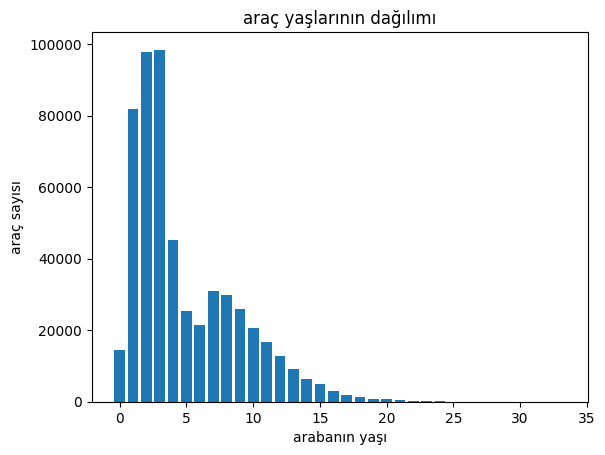

In [39]:
#araç yaşlarının sayımı
age_count = data['car_age'].value_counts().sort_index()
plt.bar(age_count.index, age_count.values)
plt.xlabel('arabanın yaşı')
plt.ylabel('araç sayısı')
plt.title('araç yaşlarının dağılımı')
plt.show()

bu grafikte araç yaşları arttıkça azalan araç sayılarını görmekteyiz

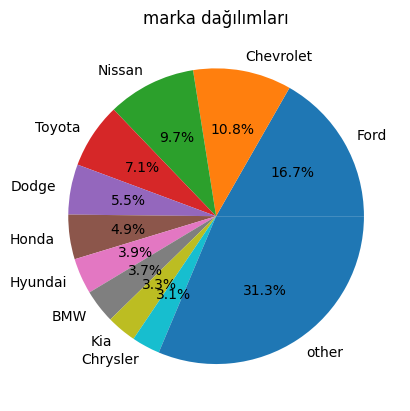

In [40]:
#markaların sayısının bulunması
brand_counts = data['make'].value_counts()

#ilk 10 markayı alıp geriye kalanları other olarak toplanması
top_10 = brand_counts.head(10)
other_total = brand_counts[10:].sum()
top_10['other'] = other_total
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%')
plt.title('marka dağılımları')
plt.show()


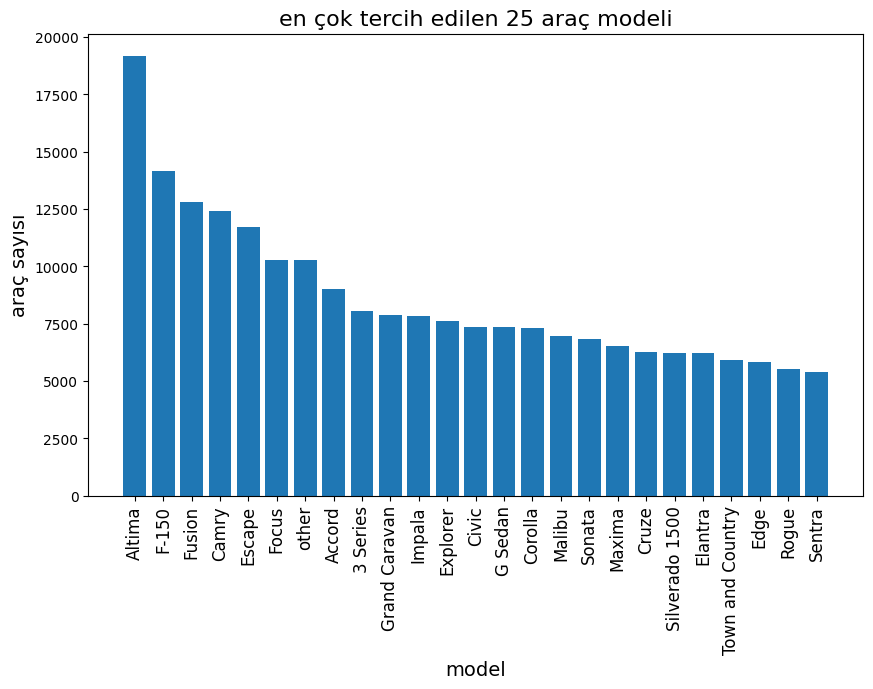

In [41]:
#araç modellerinin sıralanması
model_counts = data['model'].value_counts().head(25)

plt.figure(figsize=(10, 6))
plt.bar(model_counts.index, model_counts.values)
plt.xlabel('model', fontsize=14)
plt.ylabel('araç sayısı', fontsize=14)
plt.title('en çok tercih edilen 25 araç modeli', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.show()


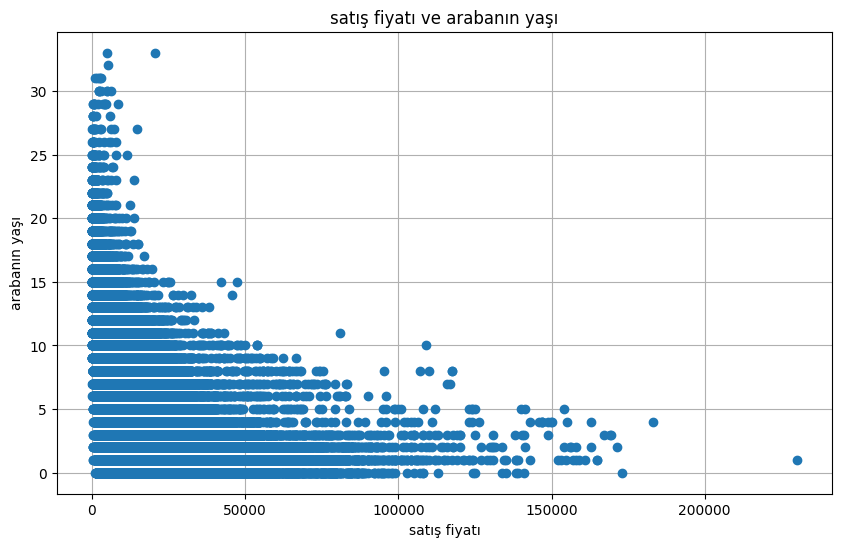

In [42]:
#satış fiyatı ve araç yaşına göre görselleştirilmesi
plt.figure(figsize=(10,6))
plt.plot(data['sellingprice'],data['car_age'],'o')
plt.xlabel('satış fiyatı')
plt.ylabel('arabanın yaşı')
plt.title('satış fiyatı ve arabanın yaşı')
plt.grid(True)
plt.show()

burada ise aracın yaşına göre satış fiyatını karşılaştırdığımızda yeni araçların fiyatları daha yüksek olduğu görünüyor

In [43]:
#araç modellerinin ortalama fiyatları ve görselleştirilmesi
model_price = data.groupby(['make'],as_index=False)['sellingprice'].mean()
model_price.sort_values('sellingprice',ascending=False,inplace=True)

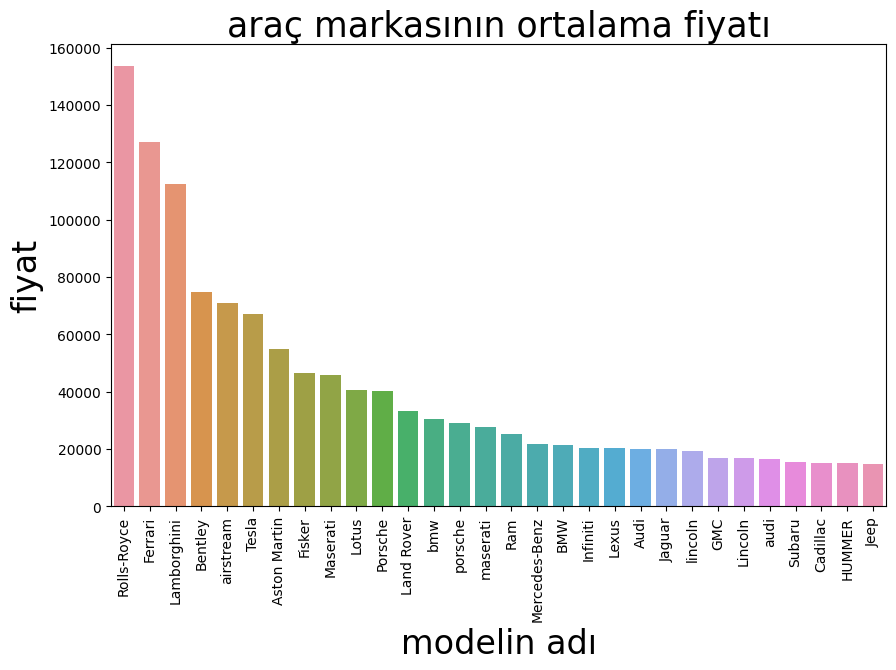

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x=model_price['make'].head(30),y=model_price['sellingprice'].head(30))
plt.xlabel('modelin adı', fontsize=24)
plt.ylabel('fiyat',fontsize=24)
plt.title('araç markasının ortalama fiyatı',fontsize=25)
plt.xticks(rotation=90)
plt.show()

burada ise araç markalarının fiyatına göre listelendiğinde Rolls-Royce ve Ferrari listenin başlarında yer almakta

In [45]:
cluster_features = ['year', 'sellingprice', 'odometer', 'car_age']


In [46]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[cluster_features])


In [47]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


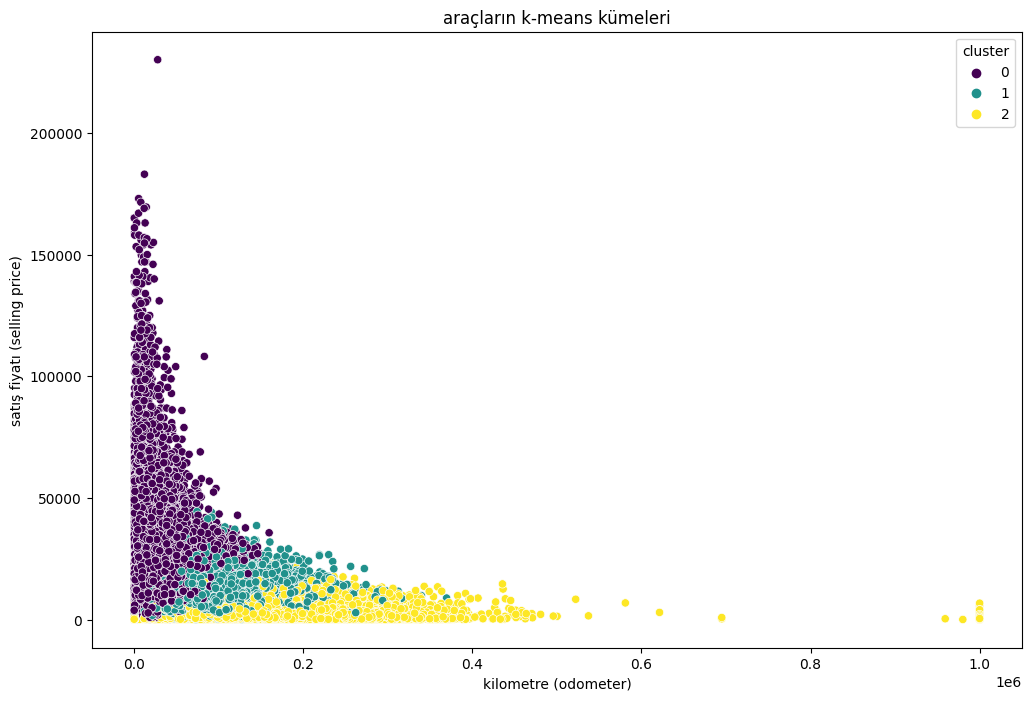

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='odometer', y='sellingprice', hue='cluster', data=data, palette='viridis')
plt.title('araçların k-means kümeleri')
plt.xlabel('kilometre (odometer)')
plt.ylabel('satış fiyatı (selling price)')
plt.show()

buradaki grafiğimizde ise kilometre ile satış fiyatları arasındaki ilişkiyi görselleştirir. küme 0 yani mor renkler düşük kilometre yüksek satış fiyatlarına sahip araçlardan oluşmaktadır. küme 1 yani açık mavi renkler bu küme iser orta kilometrede ve ortalama satış fiyatlarına sahip araçlardan oluşmaktadır. Küme 2 yani sarı renkler yüksek kilometre düşük satış fiyatına sahip araçlardan oluşmaktadır.

In [49]:
X = ml_data.drop('sellingprice', axis=1)
y = ml_data['sellingprice']  


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
#modeller ile mse skorlarının hesaplanması
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

lr_mse = -cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
dt_mse = -cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
rf_mse = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

print(f"Linear Regression MSE: {lr_mse}")
print(f"Decision Tree MSE: {dt_mse}")
print(f"Random Forest MSE: {rf_mse}")


Linear Regression MSE: 2707901.151029068
Decision Tree MSE: 4589853.113839908
Random Forest MSE: 2258556.4265719643


3 farklı makine öğrenmesi modeli kullanarak araç satış fiyatlarını tahmin etmeye çalışıyor ve hangi modelin daha iyi performans gösterdiğini ölçüyor sonucunda ise random forest modeli en iyi sonuca ulaşıyor

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf_model = RandomForestRegressor()

param_distributions = {
    'n_estimators': np.arange(100, 301, 50),  
    'max_depth': np.arange(10, 31, 10),       
    'min_samples_split': [5, 10],             
    'min_samples_leaf': [1, 2],               
    'max_features': ['sqrt'],                 
    'bootstrap': [True]     
}

random_search = RandomizedSearchCV(estimator=rf_model, 
                                   param_distributions=param_distributions, 
                                   n_iter=10,  
                                   cv=3,       
                                   verbose=2, 
                                   n_jobs=-1,
                                   random_state=42)


random_search.fit(X_train, y_train)


print("en iyi  parametre:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  58.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  59.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 1.8min


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.0min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time= 2.4min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 1.8min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time= 2.4min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time= 4.1min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.0min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time= 2.4min
[CV] END bootstrap=True, max_depth=30, max_fe

verisetim büyük olduğu için hiperparametrenin ayarlarını daraltmak durumunda kaldım. Çıktımız 30 farklı model eğitimi yapıyor en iyi parametremiz  araç fiyatlarını tahmin etmede en iyi sonucu vermiştir yani en az hatayı yapmıştır.

In [55]:
#parametre ile random forest modelini oluşturma
best_rf_model = RandomForestRegressor(n_estimators=300, 
                                      min_samples_split=5, 
                                      min_samples_leaf=2, 
                                      max_depth=30)

best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("test seti mse:", mse)

test seti mse: 2648777.213141901


In [56]:
#lineer regresyon
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
print(f"lineer regresyon test seti mse: {lr_mse}")

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
print(f"decision tree test seti mse: {dt_mse}")


lineer regresyon test seti mse: 3146051.8209800655
decision tree test seti mse: 5051698.704624551


In [57]:
from sklearn.metrics import mean_squared_error

#modeli eğit ve test et
model = RandomForestRegressor(n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=30, bootstrap=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#mse hesapla
mse = mean_squared_error(y_test, y_pred)
print("ortalama karesel hata (mse):", mse)


ortalama karesel hata (mse): 2709818.7111943467


In [1]:
from sklearn.metrics import mean_absolute_error

#mae hesaplama
mae = mean_absolute_error(y_test, y_pred)
print("ortalama mutlak hata (mae):", mae)


NameError: name 'y_test' is not defined

In [ ]:
from sklearn.metrics import r2_score

#r2 skoru hesapla
r2 = r2_score(y_test, y_pred)
print("r2 skoru:", r2)


In [ ]:
import numpy as np

threshold = 0.5 
y_pred_class = np.where(y_pred > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)

conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print("karışıklık matrisi:\n", conf_matrix)



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("ortalama karesel hata (mse):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("ortalama mutlak hata (mae):", mae)

r2 = r2_score(y_test, y_pred)
print("r2 skoru:", r2)


In [ ]:
import numpy as np

threshold = 0.5
y_pred_class = np.where(y_pred > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_class, y_pred_class)
print("doğruluk:", accuracy)


In [ ]:
import numpy as np
from sklearn.metrics import precision_score

threshold = 0.5 
y_pred_class = np.where(y_pred > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)

precision = precision_score(y_test_class, y_pred_class, average='binary')
print("kesinlik:", precision)


In [2]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

model_type = 'regression'

if model_type == 'regression':
    model = RandomForestRegressor(n_estimators=300, max_depth=30)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("regresyon mse:", mse)

elif model_type == 'classification':
    model = RandomForestClassifier(n_estimators=300, max_depth=30)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("sınıflandırma doğruluğu:", accuracy)


NameError: name 'X_train' is not defined